In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/spotify2023.csv',  encoding='iso-8859-1')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,826,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,382,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,949,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,548,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,425,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,0,144,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  mode                  953 non-null    ob

In [ ]:
data['in_deezer_playlists'] = data['in_deezer_playlists'].str.replace(',', '', regex=True).astype('int64')

In [7]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [8]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [12]:
data['in_shazam_charts'].fillna(data['in_shazam_charts'].mode()[0], inplace=True)

# data visualization

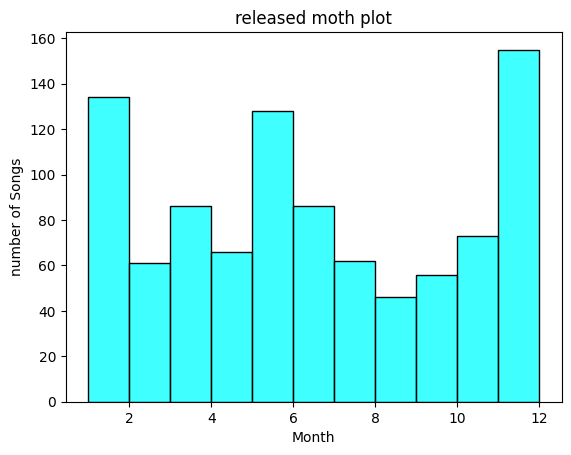

In [30]:
sns.histplot(data, x='released_month', color='cyan')
plt.title("released moth plot")

plt.xlabel('Month')
plt.ylabel('number of Songs')

plt.show()

Text(0, 0.5, 'count / 1K')

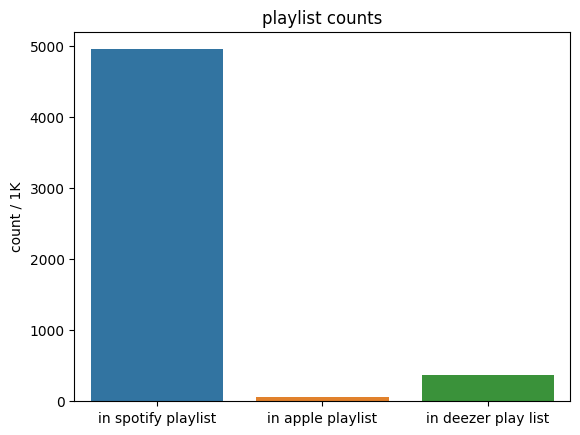

In [65]:
labels = ['in spotify playlist', 'in apple playlist', 'in deezer play list']
values = [data.in_spotify_playlists.sum()/1000, data.in_apple_playlists.sum()/1000, data.in_deezer_playlists.sum()/1000]

sns.barplot(data, x=labels, y=values)
plt.title('playlist counts')

plt.ylabel('count / 1K')

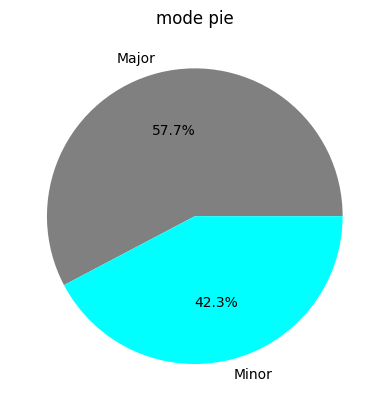

In [73]:
values = data['mode'].value_counts()
plt.pie(values,labels=['Major', 'Minor'], colors=['gray', 'cyan'], autopct='%1.1f%%')

plt.title('mode pie')
plt.show()

Text(0.5, 1.0, 'Liveness')

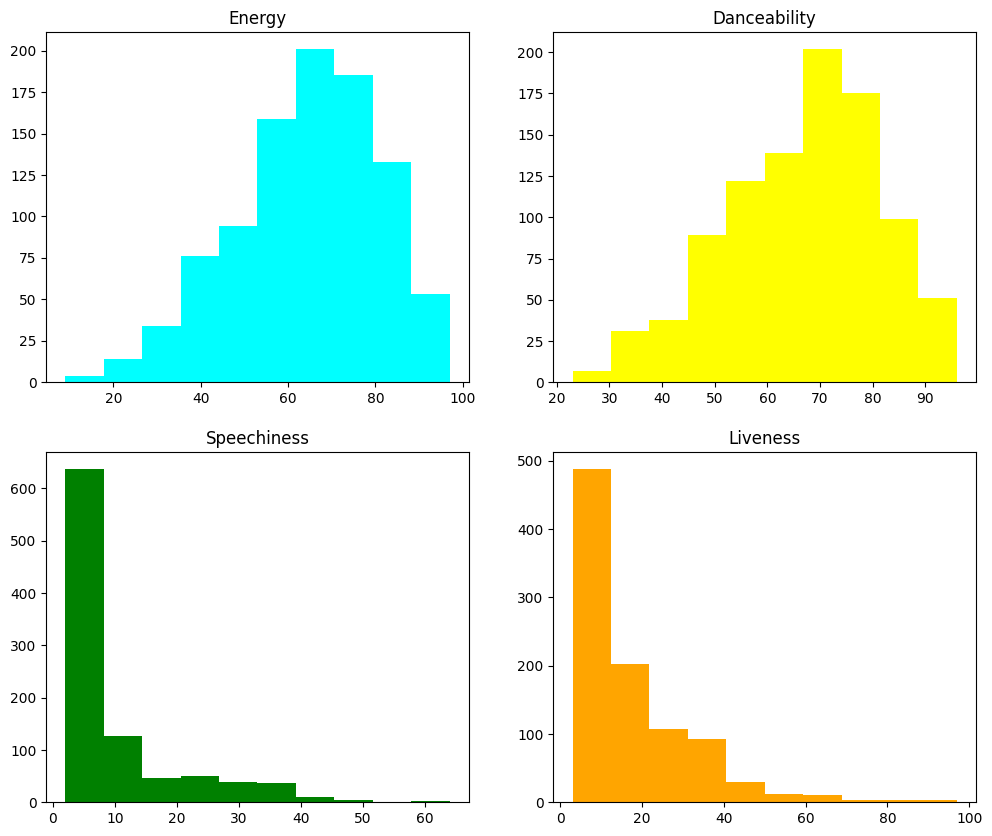

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


ax[0, 0].hist(data['energy_%'], color='cyan')
ax[0, 0].set_title('Energy')

ax[0, 1].hist(data['danceability_%'], color='yellow')
ax[0, 1].set_title('Danceability')

ax[1, 0].hist(data['speechiness_%'], color='green')
ax[1, 0].set_title('Speechiness')

ax[1, 1].hist(data['liveness_%'], color='orange')
ax[1, 1].set_title('Liveness')



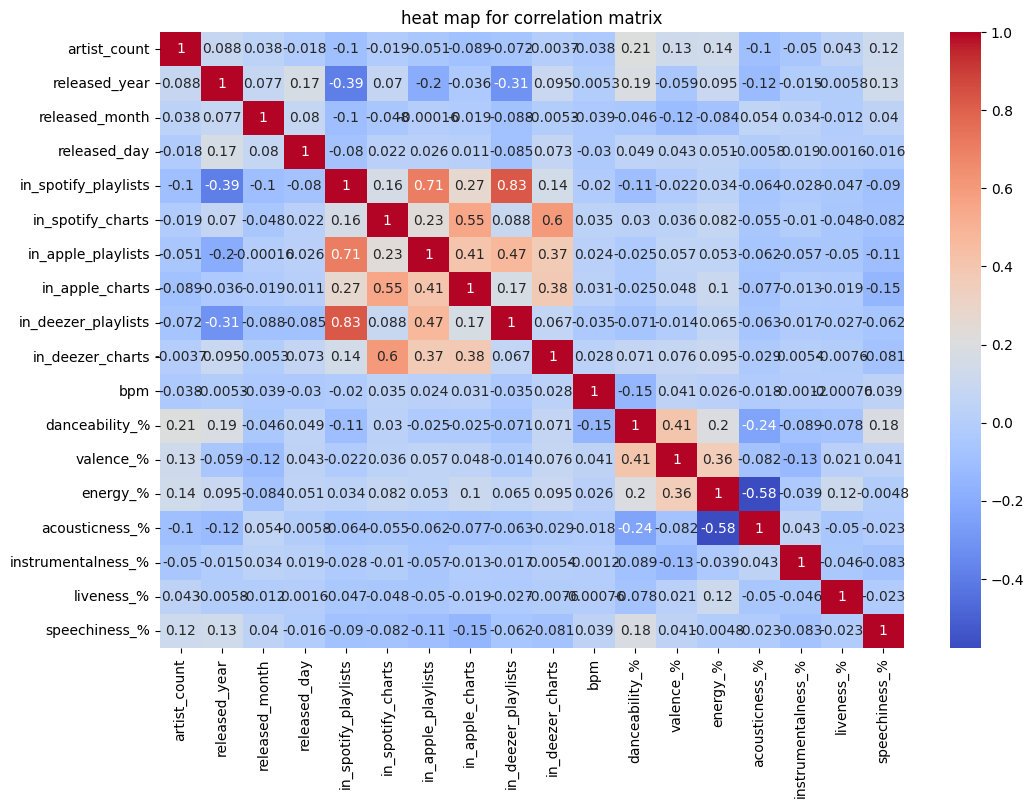

In [91]:
numeric_data = data.select_dtypes('int64')
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('heat map for correlation matrix')
plt.show()

# Building Models

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

In [119]:
cols_to_use = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%', 
    'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
    'liveness_%', 'speechiness_%'
]


x=data[cols_to_use]
y = data['streams']
y.fillna(y.mean(), inplace=True)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [121]:
DT_reg = DecisionTreeRegressor()

DT_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [134]:
models_score = {}

In [135]:
score = DT_reg.score(x_test, y_test)

preds = DT_reg.predict(x_test)

models_score['Decision Tree'] = score

print("Model score: ", score)
print('MAE : ', mean_absolute_error(preds, y_test))
print('MSE : ', mean_squared_error(preds, y_test))

Model score:  0.5667203364901527
MAE :  210344332.97905758
MSE :  1.1738761984989203e+17


In [136]:
Linear_reg = LinearRegression()
Linear_reg.fit(x_test, y_test)

LinearRegression()

In [137]:
score = Linear_reg.score(x_train, y_train)

preds = DT_reg.predict(x_test)

models_score['Linear regression'] = score

print("Model score: ", score)
print('MAE : ', mean_absolute_error(preds, y_test))
print('MSE : ', mean_squared_error(preds, y_test))

Model score:  0.6933440840176234
MAE :  210344332.97905758
MSE :  1.1738761984989203e+17


In [138]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [139]:
score = random_forest.score(x_test, y_test)

preds = random_forest.predict(x_test)

models_score['Random Forest'] = score

print("Model score: ", score)
print('MAE : ', mean_absolute_error(preds, y_test))
print('MSE : ', mean_squared_error(preds, y_test))

Model score:  0.8278363173683079
MAE :  144774858.1351718
MSE :  4.664397300582564e+16


# Neural network

In [189]:
labels = models_score.keys()
values = models_score.values()

In [190]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.losses import mean_squared_error

In [191]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(265, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(265, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

hist = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

Epoch 1/400


24/24 [==============================] - 2s 16ms/step - loss: 522389696.0000 - val_loss: 481214368.0000
Epoch 2/400
24/24 [==============================] - 0s 10ms/step - loss: 522389248.0000 - val_loss: 481213696.0000
Epoch 3/400
24/24 [==============================] - 0s 8ms/step - loss: 522387552.0000 - val_loss: 481210176.0000
Epoch 4/400
24/24 [==============================] - 0s 9ms/step - loss: 522382912.0000 - val_loss: 481202016.0000
Epoch 5/400
24/24 [==============================] - 0s 9ms/step - loss: 522372928.0000 - val_loss: 481184832.0000
Epoch 6/400
24/24 [==============================] - 0s 8ms/step - loss: 522355040.0000 - val_loss: 481147392.0000
Epoch 7/400
24/24 [==============================] - 0s 9ms/step - loss: 522324928.0000 - val_loss: 481094944.0000
Epoch 8/400
24/24 [==============================] - 0s 9ms/step - loss: 522279136.0000 - val_loss: 481011136.0000
Epoch 9/400
24/24 [==============================] - 0s 9ms/step - loss: 522210976.0000 - 

In [192]:
from sklearn.metrics import r2_score

pred = model.predict(x_test)

score = r2_score(y_test, pred)

6/6 [==============================] - 0s 2ms/step


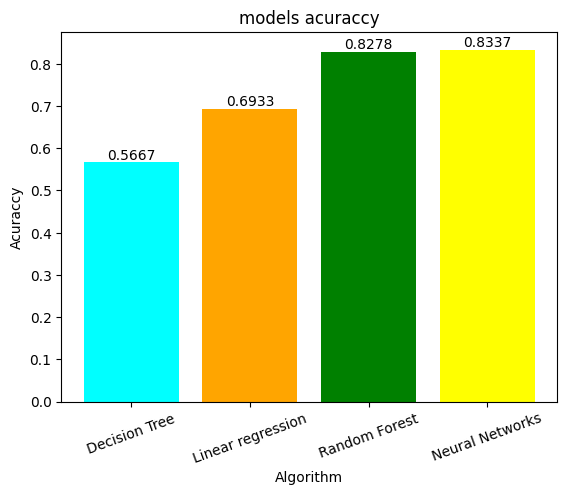

In [193]:
models_score['Neural Networks'] = score


plt.bar(list(labels), list(values), color=['cyan', 'orange', 'green', 'yellow'])
plt.title('models acuraccy')
plt.xlabel('Algorithm')
plt.ylabel('Acuraccy')

for indx, acc in enumerate(list(values)):
    plt.text(indx, acc, f'{acc:.4f}', ha='center', va='bottom')

plt.xticks(rotation=20)
plt.show()